Sharpe ratio is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. The measure was named after William F Sharpe, a Nobel laureate and professor of finance, emeritus at Stanford University.<br>
Sharpe ratio is a measure of excess portfolio return over the risk-free rate relative to its standard deviation. Normally, the 90-day Treasury bill rate is taken as the proxy for risk-free rate.<br><br>

The formula for calculating the Sharpe ratio is {R (p) – R (f)} /s (p)<br>

Where<br>
R (p): Portfolio return<br>

R (f): Risk free rate of return<br>

s (p): Standard deviation of the portfolio<br>

Realised historical return is used to calculate ex-post Sharpe ratio while ex-ante Sharpe ratio employs expected return.<br>

If two funds offer similar returns, the one with higher standard deviation will have a lower Sharpe ratio. In order to compensate for the higher standard deviation, the fund needs to generate a higher return to maintain a higher Sharpe ratio. In simple terms, it shows how much additional return an investor earns by taking additional risk. Intuitively, it can be inferred that the Sharpe ratio of a risk-free asset is zero.<br>

Portfolio diversification with assets having low to negative correlation tends to reduce the overall portfolio risk and consequently increases the Sharpe ratio. For instance, let’s take a portfolio that comprises 50 per cent equity and 50 per cent bonds with a portfolio return of 20 per cent and a standard deviation of 10 per cent. Let’s take the risk-free rate to be 5 per cent. In this case, the Sharpe ratio will be 1.5 [(20%-5%)/10%]. Let’s add another asset class to the portfolio, namely a hedge fund, and tweak the portfolio allocation to 50 per cent in equity, 40 per cent in bonds and 10 per cent in the hedge fund. After the addition, the portfolio return becomes 25 per cent and standard deviation remains at 10 per cent. If the risk-free rate is taken as 5 per cent, the new Sharpe ratio will be 2 [(25%-5%)/10%].<br>

This shows that the addition of a new asset can give a fillip to the overall portfolio return without adding any undue risk. This has the effect of augmenting the Sharpe ratio.<br>

The Sharpe ratio, however, is a relative measure of risk-adjusted return. If considered in isolation, it does not provide much information about the fund’s performance. Moreover, the measure considers standard deviation, which assumes a symmetrical distribution of returns. For asymmetrical return distribution with a Skewness greater or lesser than zero and Kurtosis greater or lesser than 3, the Sharpe ratio may not be a good measure of performance.<br>

Considering standard deviation as a proxy for risk has its pitfalls. Standard deviation takes into account both the positive as well as the negative deviation in returns from the mean, hence it doesn’t accurately measure the downside risk. Measures like Sortino, which only considers negative deviation from the mean return, can remove the limitation of Sharpe ratio to some extent.<br>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FuncFormatter
import datetime

In [ ]:
testwatch= ['ONGC','ASHOKLEY', 'TATAMOTORS', 'RELIANCE', 'HDFC','HDFCBANK','INFY','WIPRO','HINDUNILVR','ASIANPAINT']

In [ ]:
def get_adj_price(list,  start, source='NS', end=datetime.datetime.now()):
  #For-loop for grabing yahoo finance data and setting as a dataframe
  # Set DataFrame as the Stock Ticker
  suffix= '.'+ source
  list = [stock + suffix for stock in list]
  return web.DataReader(list, 'yahoo' ,start, end)['Adj Close'] #adjusted close

In [ ]:
df_stocks= get_adj_price(testwatch, '2020-06-01')
df_stocks.columns= testwatch

In [ ]:
df_stocks.head()

,ONGC,ASHOKLEY,TATAMOTORS,RELIANCE,HDFC,HDFCBANK,INFY,WIPRO,HINDUNILVR,ASIANPAINT
Date,,,,,,,,,,
2020-06-01,82.533974,46.400002,89.550003,1514.662720,1699.768677,987.650024,692.114868,214.567612,2071.928223,1689.173462
2020-06-02,82.878075,47.700001,96.500000,1529.955200,1773.963135,1001.000000,700.573975,215.365814,2070.798340,1705.184814
2020-06-03,84.844345,47.150002,98.750000,1535.883057,1795.580688,1022.250000,694.093628,210.875916,2083.670654,1712.417480
2020-06-04,83.467957,45.750000,98.500000,1573.890381,1725.788208,1001.700012,700.227722,215.764923,2083.768799,1629.816772
2020-06-05,85.483368,48.349998,110.750000,1575.783203,1728.037842,1033.349976,696.072388,218.259308,2051.342041,1634.605225


Text(0, 0.5, 'price in ₹')

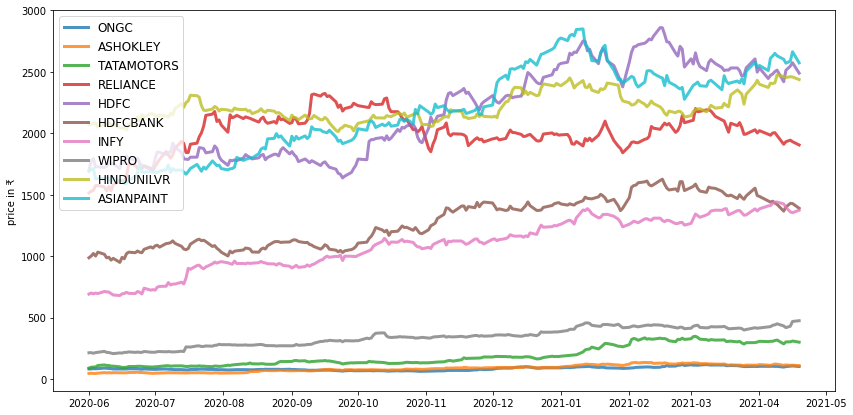

In [ ]:
plt.figure(figsize=(14, 7))
for c in df_stocks.columns.values:
    plt.plot(df_stocks.index, df_stocks[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in ₹')

Text(0, 0.5, 'daily returns')

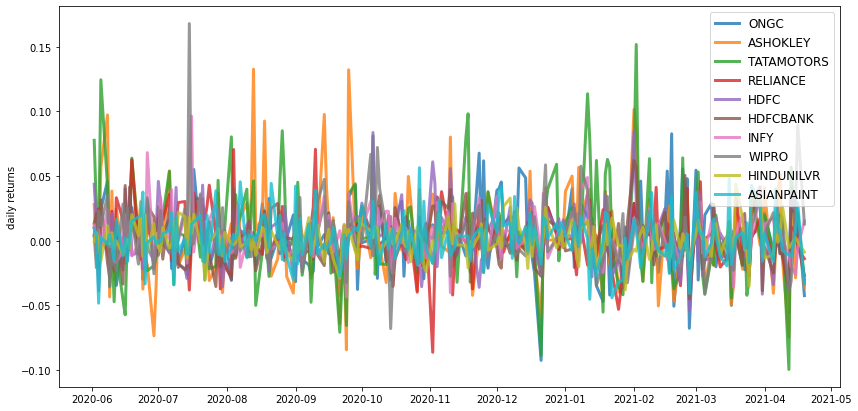

In [ ]:
returns = df_stocks.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
import scipy.optimize as sco

In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.061 # 6.1 %

In [ ]:

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df_stocks.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df_stocks.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    display(max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    display(min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(df_stocks.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(df_stocks.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.98
Annualised Volatility: 0.25




,ONGC,ASHOKLEY,TATAMOTORS,RELIANCE,HDFC,HDFCBANK,INFY,WIPRO,HINDUNILVR,ASIANPAINT
allocation,0.0,2.14,24.48,0.0,0.0,0.0,36.89,19.64,0.0,16.85


--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.39
Annualised Volatility: 0.15




,ONGC,ASHOKLEY,TATAMOTORS,RELIANCE,HDFC,HDFCBANK,INFY,WIPRO,HINDUNILVR,ASIANPAINT
allocation,6.04,0.0,0.0,11.01,3.0,11.27,13.11,2.27,43.36,9.94


--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

ONGC : annuaised return 0.32 , annualised volatility: 0.39
ASHOKLEY : annuaised return 1.11 , annualised volatility: 0.51
TATAMOTORS : annuaised return 1.53 , annualised volatility: 0.54
RELIANCE : annuaised return 0.31 , annualised volatility: 0.31
HDFC : annuaised return 0.49 , annualised volatility: 0.33
HDFCBANK : annuaised return 0.43 , annualised volatility: 0.3
INFY : annuaised return 0.82 , annualised volatility: 0.29
WIPRO : annuaised return 0.97 , annualised volatility: 0.36
HINDUNILVR : annuaised return 0.21 , annualised volatility: 0.2
ASIANPAINT : annuaised return 0.52 , annualised volatility: 0.29
--------------------------------------------------------------------------------


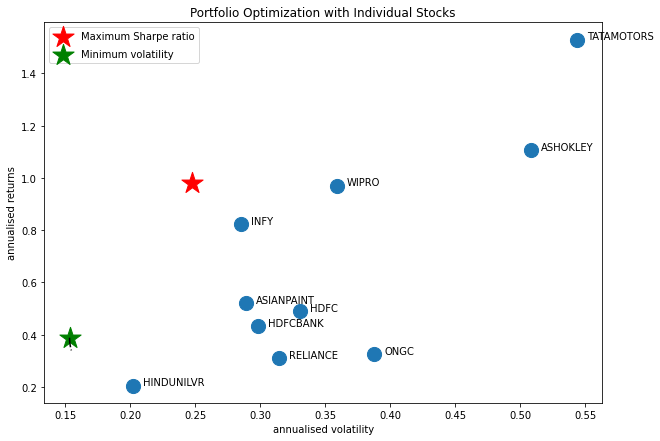

In [ ]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)